# Support Vector Classifier:



In this project, we will build a Support Vector Machines classifier to classify a Pulsar star. we will use the **Predicting a Pulsar Star** dataset from the Kaggle open source.

## Table of Contents


1.	Introduction to Support Vector Machines

2.	Support Vector Machines intuition

3.	Kernel trick

4.	The problem statement

5.	Dataset description

6.	Import libraries

7.	Import dataset

8.	Exploratory data analysis

9.	Declare feature vector and target variable

10.	Split data into separate training and test set

11.	Feature scaling

12.	Run SVM with default hyperparameters

13.	Run SVM with linear kernel

14.	Run SVM with polynomial kernel

15.	Run SVM with sigmoid kernel

16.	Confusion matrix

17.	Classification metrices

18.	ROC - AUC

19.	Stratified k-fold Cross Validation with shuffle split

20.	Hyperparameter optimization using GridSearch CV

21.	Results and conclusion


### 1. Introduction to Support Vector Machines


- SVM is a powerful ML algorithm used for **classification, regression, and outlier detection**.

- Developed by Vladimir Vapnik & Alexey Chervonenkis (1963), improved with the kernel trick (1992) by Boser, Guyon, Vapnik.

- SVM uses a `hyperplane` to classify data with maximum margin.

- Works for both linear & non-linear classification using the kernel trick.


### 2. Support Vector Machines intuition


#### Hyperplane

- A decision boundary that separates different classes.
- The best hyperplane maximizes the margin between classes.

#### Support Vectors

- Closest data points to the hyperplane.
- Help in defining the decision boundary.

#### Margin

- The gap between support vectors from different classes.
- SVM maximizes this margin for better classification.

#### SVM Working Process

- Find multiple hyperplanes that classify data.
- Choose the hyperplane with the maximum margin (Maximum Margin Hyperplane).

#### Problem with Dispersed Data

- When data is not linearly separable, SVM uses the kernel trick to map data to higher dimensions.

### 3. Kernel trick


- Kernel: A function that maps data into a higher-dimensional space where it becomes linearly separable.

- Helps in handling non-linear classification problems.

- Popular Kernels:

    1. Linear Kernel – Used for linearly separable data.

    2. Polynomial Kernel – Maps data into polynomial space.

    3. RBF (Radial Basis Function) Kernel – Handles complex non-linear data.

    4. Sigmoid Kernel – Works like a neural network activation function.

### 4. The problem statement


- Goal: Classify pulsar stars as legitimate (real) or spurious (fake) using SVM.

- Legitimate pulsars → Minority class (positive)

- Spurious pulsars → Majority class (negative)

- Dataset: "Predicting a Pulsar Star" from Kaggle.


### 5. Dataset description


- Source: Kaggle (Dataset Link)

- What are Pulsars?

    - Neutron stars emitting radio signals.

    - Used for studying space-time & interstellar medium.

- Classification Task:

    - Binary classification (Pulsar = 1, Not Pulsar = 0).

- Dataset Details:

    - Total samples: 17,898

    - Spurious pulsars (Noise/RFI): 16,259 (Negative class)

    - Legitimate pulsars (Real stars): 1,639 (Positive class)

    - Features: Variables describing signals, last column is the class label.



### Attribute Information:


Each candidate is described by 8 continuous variables, and a single class variable. The first four are simple statistics obtained from the integrated pulse profile. The remaining four variables are similarly obtained from the DM-SNR (delta modulation and signal to noise ratio) curve . These are summarised below:

1. Mean of the integrated profile.

2. Standard deviation of the integrated profile.

3. Excess kurtosis of the integrated profile.

4. Skewness of the integrated profile.

5. Mean of the DM-SNR curve.

6. Standard deviation of the DM-SNR curve.

7. Excess kurtosis of the DM-SNR curve.

8. Skewness of the DM-SNR curve.

9. Class

### 6. Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings

warnings.filterwarnings('ignore')

### 7. Loading dataset

In [ ]:
data = "Datasets/pulsar_stars.csv"

df = pd.read_csv(data)

### 8. Exploratory data analysis

In [4]:
# Dimensions

df.shape

(17898, 9)

We can see that there are 17898 instances and 9 feature variables in the data set.

In [5]:
# let's preview the dataset

df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


We can see that there are 9 variables in the dataset. 8 are continuous variables and 1 is discrete variable. The discrete variable is `target_class` variable. It is also the target variable.

In [6]:
# view the column names of the dataframe

col_names = df.columns

col_names

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [7]:
# rename column names

df.columns = ['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 
              'DM-SNR Mean', 'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class']

In [8]:
# view the renamed column names

df.columns

Index(['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 'DM-SNR Mean',
       'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class'],
      dtype='object')

here, 
- IP stands for `integrated profile`.

- DM-SNR stands for `delta modulation and signal to noise ratio`.

In [9]:
# check distribution of target_class column

df['target_class'].value_counts()

target_class
0    16259
1     1639
Name: count, dtype: int64

In [10]:
# view the percentage distribution of target_class column

df['target_class'].value_counts()/np.int32(len(df))

target_class
0    0.908426
1    0.091574
Name: count, dtype: float64

Percentage of observations,

- `0` -> 90.84% 

- `1` -> 9.16%.

So, this is a class imbalanced problem. I will deal with that in later section.

In [11]:
# view summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IP Mean          17898 non-null  float64
 1   IP Sd            17898 non-null  float64
 2   IP Kurtosis      17898 non-null  float64
 3   IP Skewness      17898 non-null  float64
 4   DM-SNR Mean      17898 non-null  float64
 5   DM-SNR Sd        17898 non-null  float64
 6   DM-SNR Kurtosis  17898 non-null  float64
 7   DM-SNR Skewness  17898 non-null  float64
 8   target_class     17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


We can see that there are no missing values in the dataset and all the variables are numerical variables.

### Explore missing values in variables

In [12]:
# check for missing values in variables

df.isnull().sum()

IP Mean            0
IP Sd              0
IP Kurtosis        0
IP Skewness        0
DM-SNR Mean        0
DM-SNR Sd          0
DM-SNR Kurtosis    0
DM-SNR Skewness    0
target_class       0
dtype: int64

We can see that there are no missing values in the dataset.

### Summary of numerical variables


- There are 9 numerical variables in the dataset.


- 8 are continuous variables and 1 is discrete variable. 


- The discrete variable is `target_class` variable. It is also the target variable.


- There are no missing values in the dataset.

### Outliers in numerical variables

In [13]:
# view summary statistics in numerical variables

round(df.describe(),2)

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness,target_class
count,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00
mean,111.08,46.55,0.48,1.77,12.61,26.33,8.30,104.86,0.09
std,25.65,6.84,1.06,6.17,29.47,19.47,4.51,106.51,0.29
min,5.81,24.77,-1.88,-1.79,0.21,7.37,-3.14,-1.98,0.00
25%,100.93,42.38,0.03,-0.19,1.92,14.44,5.78,34.96,0.00
50%,115.08,46.95,0.22,0.20,2.80,18.46,8.43,83.06,0.00
75%,127.09,51.02,0.47,0.93,5.46,28.43,10.70,139.31,0.00
max,192.62,98.78,8.07,68.10,223.39,110.64,34.54,1191.00,1.00


On closer inspection, we can suspect that all the continuous variables may contain outliers.


Now, We will draw boxplots to visualise outliers in the above variables. 

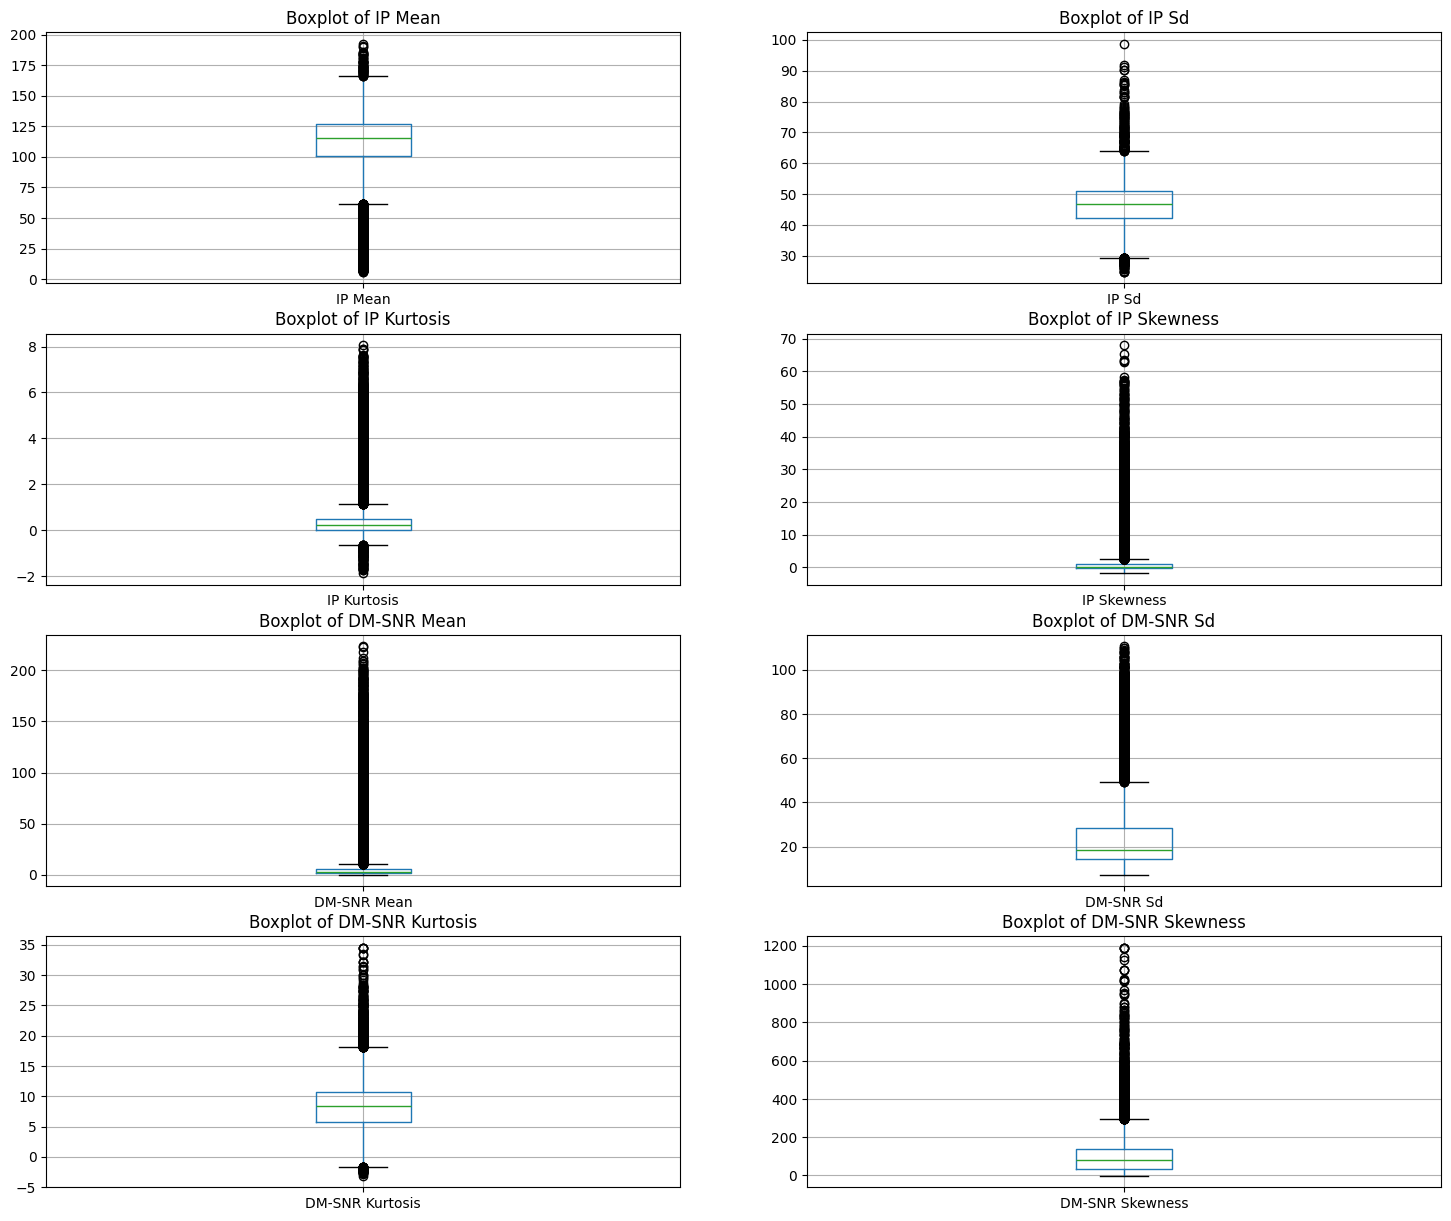

In [17]:
# List of columns to plot
columns = ['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 
           'DM-SNR Mean', 'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness']

# Set figure size
plt.figure(figsize=(18, 15))

# Loop through columns and create boxplots
for i, col in enumerate(columns, 1):
    plt.subplot(4, 2, i)  # Arrange in 4 rows, 2 columns
    df.boxplot(column=col)
    plt.title(f'Boxplot of {col}')

plt.show()


The above boxplots confirm that there are lot of outliers in these variables.

We will use soft margin SVM that can handle outliers.

### Check the distribution of variables


Now, I will plot the histograms to check distributions to find out if they are normal or skewed. 

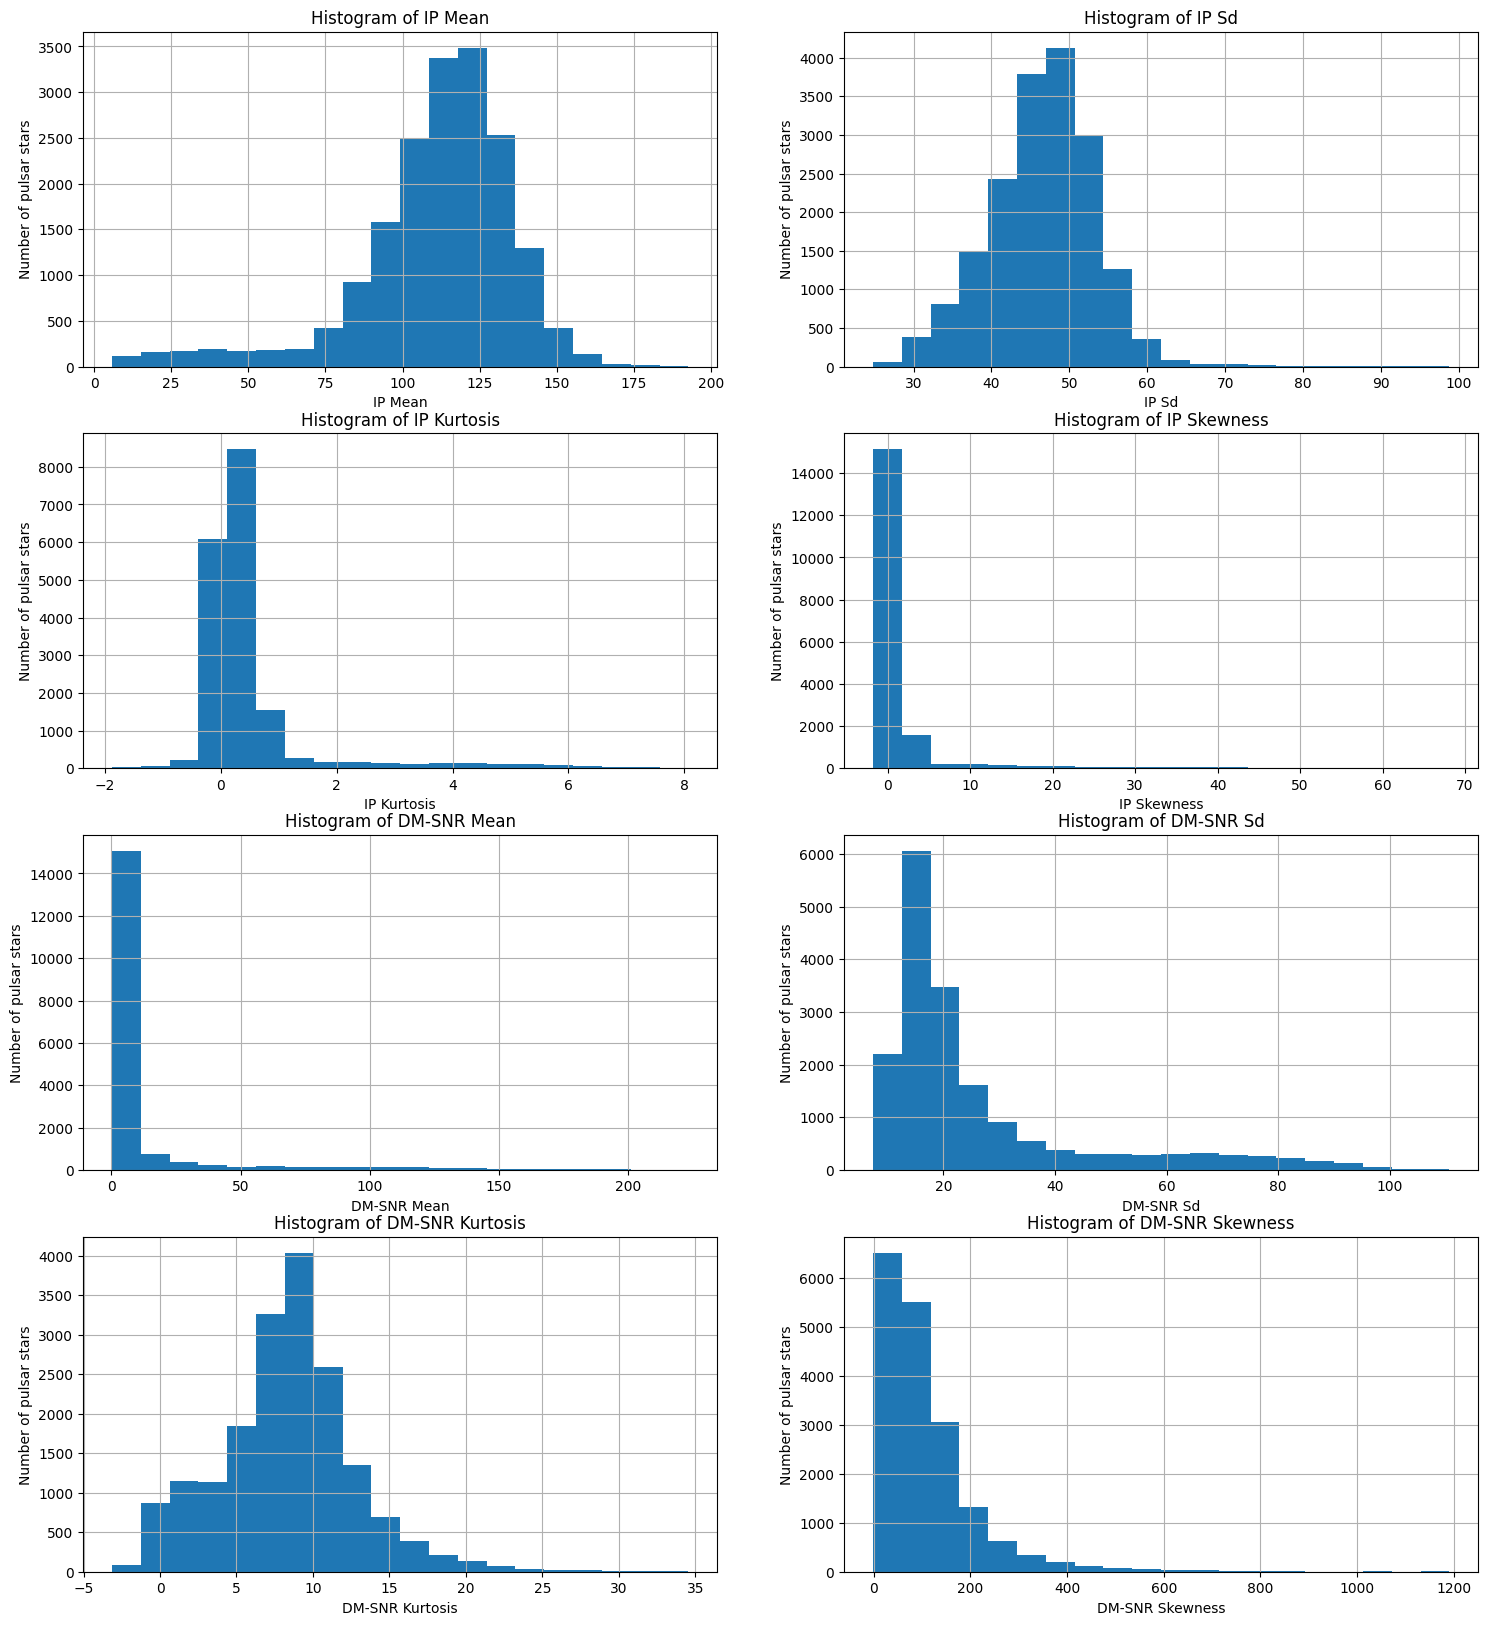

In [ ]:
# plot histogram to check distribution

plt.figure(figsize=(18,20))

for i, col in enumerate(columns, 1):
    plt.subplot(4, 2, i)
    df[col].hist(bins=20)
    plt.xlabel(col)
    plt.ylabel('Number of pulsar stars')
    plt.title(f'Histogram of {col}')

plt.show()

We can see that all the 8 continuous variables are skewed. 

### 9. Declare feature vector and target variable

In [22]:
X = df.drop(['target_class'], axis=1)

y = df['target_class']

### 10. Split data into separate training and test set

In [23]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [24]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((14318, 8), (3580, 8))

### 11. Feature Scaling

In [25]:
cols = X_train.columns

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)


In [27]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [30]:
np.round((X_train.describe()),4)

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness
count,14318.0000,14318.0000,14318.0000,14318.0000,14318.0000,14318.0000,14318.0000,14318.0000
mean,0.0000,-0.0000,0.0000,0.0000,-0.0000,-0.0000,-0.0000,0.0000
std,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
min,-4.0355,-3.1810,-2.1859,-0.5744,-0.4239,-0.9734,-2.4556,-1.0034
25%,-0.3896,-0.6069,-0.4256,-0.3188,-0.3665,-0.6125,-0.5641,-0.6628
50%,0.1587,0.0585,-0.2453,-0.2578,-0.3372,-0.4067,0.0317,-0.2059
75%,0.6267,0.6501,-0.0100,-0.1420,-0.2464,0.1079,0.5363,0.3256
max,3.1519,7.6211,7.0089,10.5443,7.0256,4.2922,5.8186,10.2461


We now have X_train dataset ready to be fed into the `SVM classifier`.

### Support Vector Classifier (SVC) Parameters and Hyperparameters

`doc`: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

1. `C (Regularization Parameter)`

- Controls the trade-off between margin size and misclassification.

- Default: C=1.0

- Low C (e.g., 0.1, 0.01):

    - Allows more misclassification.

    - Results in a larger margin (simpler model, better generalization).

- High C (e.g., 10, 100):

    - Reduces misclassification but leads to a smaller margin.

    - More sensitive to outliers, increasing risk of overfitting.


2. `kernel (Type of Decision Boundary)`

- Defines how the data is transformed before classification.

- Default: 'rbf'

- Types:

    - 'linear' → Works well for linearly separable data.

    - 'poly' → Uses polynomial transformation (degree is controlled by degree parameter).

    - 'rbf' → Uses radial basis function (Gaussian). Good for complex data.

    - 'sigmoid' → Maps input like a neural network activation function.


3. `degree (Only for poly Kernel)`

- Controls the degree of the polynomial kernel.

- Default: degree=3

- Higher degree (e.g., 4, 5) → More complex decision boundary.

- Lower degree (e.g., 1, 2) → Simpler decision boundary.

4. `gamma (Only for rbf, poly, sigmoid Kernels)` 

- Controls the influence of each training example. 

- Default: 'scale' (1 / (number of features × variance of data)) 

- Types: 

    - Low gamma (0.01, 0.1) → Model considers points far from the decision boundary (simpler model). 

    - High gamma (1, 10) → Model only focuses on points close to the decision boundary (more complex, can overfit). 


5. `coef0 (Only for poly and sigmoid Kernels)`

- Default: coef0=0.0

- Controls how much influence the higher-degree terms have in poly and sigmoid kernels.

6. `probability`

- Default: False

- If True, enables probability estimates (slower because it requires cross-validation).

7. `shrinking`

- Default: True

- If True, enables faster computation using a shrinking heuristic.

8. `tol (Tolerance for Stopping Criteria)`

- Default: tol=1e-3

- Lower values mean more precise optimization but slower training.

9. `class_weight`

- Default: None (equal weight for all classes)

- If 'balanced', assigns higher weight to minority classes in imbalanced datasets.

10. `max_iter (Maximum Iterations)`

- Default: -1 (no limit, runs until convergence)

- If set to a number (e.g., 1000), training stops after that many iterations.

11. `random_state`

- Default: None

- If set to an integer (e.g., 42), ensures reproducibility.

12. `decision_function_shape`

- Default: 'ovr' (one-vs-rest for multi-class classification)

- If 'ovo', uses one-vs-one strategy (better for large datasets).


### 12. Run SVM with default hyperparameters

Default hyperparameter means C=1.0,  kernel=`rbf` and gamma=`scale` among other parameters.

In [31]:
# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC() 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9827


#### Run SVM with rbf kernel and C=100.0


We have seen that there are outliers in our dataset. So, we should increase the value of C as higher C means fewer outliers. 
So, I will run SVM with kernel=`rbf` and C=100.0.

In [32]:
# instantiate classifier with rbf kernel and C=100
svc=SVC(C=100.0) 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.9832


We can see that we obtain a higher accuracy with C=100.0 as higher C means less outliers.

Now, I will further increase the value of C=1000.0 and check accuracy.

#### Run SVM with rbf kernel and C=1000.0


In [33]:
# instantiate classifier with rbf kernel and C=1000
svc=SVC(C=1000.0) 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=1000.0 : 0.9816


In this case, we can see that the accuracy had decreased with C=1000.0

### 13. Run SVM with linear kernel


#### Run SVM with linear kernel and C=1.0

In [34]:
# instantiate classifier with linear kernel and C=1.0
linear_svc=SVC(kernel='linear', C=1.0) 


# fit classifier to training set
linear_svc.fit(X_train,y_train)


# make predictions on test set
y_pred_test=linear_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))


Model accuracy score with linear kernel and C=1.0 : 0.9830


#### Run SVM with linear kernel and C=100.0

In [35]:
# instantiate classifier with linear kernel and C=100.0
linear_svc100=SVC(kernel='linear', C=100.0) 


# fit classifier to training set
linear_svc100.fit(X_train, y_train)


# make predictions on test set
y_pred=linear_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=100.0 : 0.9832


#### Run SVM with linear kernel and C=1000.0

In [36]:
# instantiate classifier with linear kernel and C=1000.0
linear_svc1000=SVC(kernel='linear', C=1000.0) 


# fit classifier to training set
linear_svc1000.fit(X_train, y_train)


# make predictions on test set
y_pred=linear_svc1000.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=1000.0 : 0.9832


We can see that we can obtain higher accuracy with C=100.0 and C=1000.0 as compared to C=1.0.

Here, **y_test** are the true class labels and **y_pred** are the predicted class labels in the test-set.

### Compare the train-set and test-set accuracy


Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [37]:
y_pred_train = linear_svc.predict(X_train)

y_pred_train

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [38]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9783


We can see that the training set and test-set accuracy are very much comparable.

### Check for overfitting and underfitting

In [39]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(linear_svc.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(linear_svc.score(X_test, y_test)))

Training set score: 0.9783
Test set score: 0.9830


The training-set accuracy score is 0.9783 while the test-set accuracy to be 0.9830. These two values are quite comparable. So, there is no question of overfitting. 


### 14. Run SVM with polynomial kernel


#### Run SVM with polynomial kernel and C=1.0

In [40]:
# instantiate classifier with polynomial kernel and C=1.0
poly_svc=SVC(kernel='poly', C=1.0) 


# fit classifier to training set
poly_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=poly_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with polynomial kernel and C=1.0 : 0.9807


#### Run SVM with polynomial kernel and C=100.0

In [41]:
# instantiate classifier with polynomial kernel and C=100.0
poly_svc100=SVC(kernel='poly', C=100.0) 


# fit classifier to training set
poly_svc100.fit(X_train, y_train)


# make predictions on test set
y_pred=poly_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.9824


Polynomial kernel gives poor performance. It may be overfitting the training set.

### 15. Run SVM with sigmoid kernel


#### Run SVM with sigmoid kernel and C=1.0

In [48]:
# instantiate classifier with sigmoid kernel and C=1.0
sigmoid_svc=SVC(kernel='sigmoid', C=1.0) 


# fit classifier to training set
sigmoid_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=sigmoid_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with sigmoid kernel and C=1.0 : 0.8858


#### Run SVM with sigmoid kernel and C=100.0

In [49]:
# instantiate classifier with sigmoid kernel and C=100.0
sigmoid_svc100=SVC(kernel='sigmoid', C=100.0) 


# fit classifier to training set
sigmoid_svc100.fit(X_train,y_train)


# make predictions on test set
y_pred=sigmoid_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with sigmoid kernel and C=100.0 : 0.8855


We can see that sigmoid kernel is also performing poorly just like with polynomial kernel.

### Comments on Model Performance

- The best accuracy (0.9832) is achieved using the RBF and Linear kernel with C = 100.0.
      
- This suggests that our model is performing well in classifying pulsar stars.

### Issue: Imbalanced Dataset

- The dataset is imbalanced, meaning one class has more samples than the other.

- Accuracy is not a reliable metric for evaluating performance in such cases.

- A high accuracy may be misleading if the model is predicting the majority class most of the time.

### Better Evaluation Approach

- Instead of accuracy, we should explore alternative metrics to assess model performance.

- It is important to understand:

- How well the model predicts both classes.

- What types of errors the model is making.

- A useful metric for imbalanced classification problems is the Confusion Matrix.

### 16. Confusion matrix

In [42]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[3289   17]
 [  44  230]]

True Positives(TP) =  3289

True Negatives(TN) =  230

False Positives(FP) =  17

False Negatives(FN) =  44


The confusion matrix shows `3289 + 230 = 3519 correct predictions` and `17 + 44 = 61 incorrect predictions`.


In this case, we have


- `True Positives` (Actual Positive:1 and Predict Positive:1) - 3289


- `True Negatives` (Actual Negative:0 and Predict Negative:0) - 230


- `False Positives` (Actual Negative:0 but Predict Positive:1) - 17 `(Type I error)`


- `False Negatives` (Actual Positive:1 but Predict Negative:0) - 44 `(Type II error)`

<Axes: >

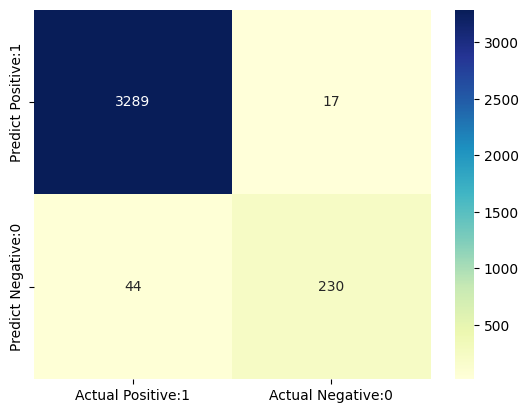

In [51]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### 17. Classification metrices

### Classification Report


**Classification report** is another way to evaluate the classification model performance. It displays the  **precision**, **recall**, **f1** and **support** scores for the model. I have described these terms in later.

We can print a classification report as follows:-

In [52]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3306
           1       0.93      0.84      0.88       274

    accuracy                           0.98      3580
   macro avg       0.96      0.92      0.94      3580
weighted avg       0.98      0.98      0.98      3580



### 18. ROC - AUC 
-> (Receiver Operating Characteristic - Area Under Curve)

1. What is ROC Curve?

    - A visual tool to measure classification model performance.

    - It shows how well the model distinguishes between classes at different thresholds.

2. How is ROC Curve Plotted?

    - X-axis: False Positive Rate (FPR) = FP / (FP + TN)

    - Y-axis: True Positive Rate (TPR) = TP / (TP + FN) (also called Recall)

3. How to Interpret ROC Curve?

    - Each point on the curve represents a threshold level.

    - Lowering the threshold increases both True Positives (TP) and False Positives (FP).

    - A good model has a high TPR and low FPR.


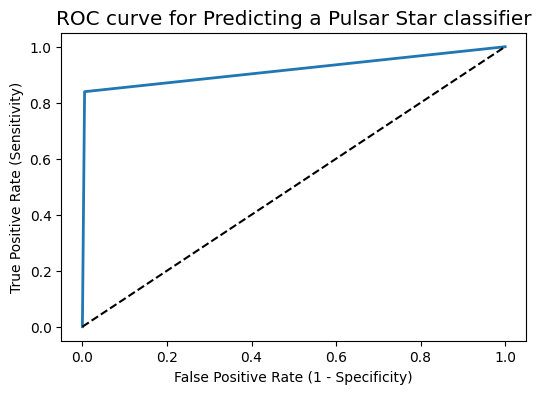

In [53]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Predicting a Pulsar Star classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()


ROC curve help us to choose a threshold level that balances sensitivity and specificity for a particular context.

### ROC  AUC


**ROC AUC** stands for **Receiver Operating Characteristic - Area Under Curve**. It is a technique to compare classifier performance. In this technique, we measure the `area under the curve (AUC)`. A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5. 


So, **ROC AUC** is the percentage of the ROC plot that is underneath the curve.

In [54]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred_test)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9171


### Comments


- ROC AUC is a single number summary of classifier performance. The higher the value, the better the classifier.

- ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a good job in classifying the pulsar star.

In [55]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(linear_svc, X_train, y_train, cv=10, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.9756


### 19. Stratified k-fold Cross Validation with shuffle split


k-fold cross-validation is a very useful technique to evaluate model performance. But, it fails here because we have a imbalnced dataset. So, in the case of imbalanced dataset, I will use another technique to evaluate model performance. It is called `stratified k-fold cross-validation`.


In `stratified k-fold cross-validation`, we split the data such that the proportions between classes are the same in each fold as they are in the whole dataset.


Moreover, I will shuffle the data before splitting because shuffling yields much better result.

### Stratified k-Fold Cross Validation with shuffle split with  linear kernel

In [56]:
from sklearn.model_selection import KFold


kfold=KFold(n_splits=5, shuffle=True, random_state=0)


linear_svc=SVC(kernel='linear')


linear_scores = cross_val_score(linear_svc, X, y, cv=kfold)


In [57]:
# print cross-validation scores with linear kernel

print('Stratified cross-validation scores with linear kernel:\n\n{}'.format(linear_scores))

Stratified cross-validation scores with linear kernel:

[0.98296089 0.97458101 0.97988827 0.97876502 0.97848561]


In [58]:
# print average cross-validation score with linear kernel

print('Average stratified cross-validation score with linear kernel:{:.4f}'.format(linear_scores.mean()))

Average stratified cross-validation score with linear kernel:0.9789


### Stratified k-Fold Cross Validation with shuffle split with rbf kernel

In [59]:
rbf_svc=SVC(kernel='rbf')


rbf_scores = cross_val_score(rbf_svc, X, y, cv=kfold)

In [60]:
# print cross-validation scores with rbf kernel

print('Stratified Cross-validation scores with rbf kernel:\n\n{}'.format(rbf_scores))

Stratified Cross-validation scores with rbf kernel:

[0.97849162 0.97011173 0.97318436 0.9709416  0.96982397]


In [61]:
# print average cross-validation score with rbf kernel

print('Average stratified cross-validation score with rbf kernel:{:.4f}'.format(rbf_scores.mean()))

Average stratified cross-validation score with rbf kernel:0.9725


### Comments


I obtain higher average stratified k-fold cross-validation score of 0.9789 with linear kernel but the model accuracy is 0.9832.
So, stratified cross-validation technique does not help to improve the model performance.

### 20. Hyperparameter Optimization using GridSearch CV

In [ ]:
# import GridSearchCV
from sklearn.model_selection import GridSearchCV


# import SVC classifier
from sklearn.svm import SVC


# instantiate classifier with default hyperparameters with kernel=rbf, C=1.0 and gamma=auto
svc=SVC() 



# declare parameters for hyperparameter tuning
parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]} 
              ]




grid_search = GridSearchCV(estimator = svc,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)


In [ ]:
# examine the best model


# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))


# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))


# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.9793


Parameters that give the best results : 

 {'C': 10, 'gamma': 0.3, 'kernel': 'rbf'}


Estimator that was chosen by the search : 

 SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.3, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [ ]:
# calculate GridSearch CV score on test set

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV score on test set: 0.9835


### Comments


- Our original model test accuracy is 0.9832 while GridSearch CV score on test-set is 0.9835.


- So, GridSearch CV helps to identify the parameters that will improve the performance for this particular model.


- Here, we should not confuse `best_score_` attribute of `grid_search` with the `score` method on the test-set. 


- The `score` method on the test-set gives the generalization performance of the model. Using the `score` method, we employ a model trained on the whole training set.


- The `best_score_` attribute gives the mean cross-validation accuracy, with cross-validation performed on the training set.

### 21. Results and Conclusion

1. Effect of Outliers

    - The dataset contains outliers.

    - Increasing C (penalty parameter) reduces outliers and improves accuracy.

2. Accuracy and Imbalanced Dataset

    - `Maximum accuracy (0.9832)` achieved with rbf and linear kernels (C=100.0).

    - Accuracy alone is misleading due to dataset imbalance.

    - Confusion matrix is a better metric for evaluating model performance.

3. ROC AUC Score

    - ROC AUC score is `close to 1`, meaning the classifier performs well.

4. Stratified K-Fold Cross-Validation

    - `Cross-validation score (0.9789)` is slightly lower than model accuracy (0.9832).

    - Stratified cross-validation did not significantly improve model performance.

5. GridSearchCV Improvement

    - Original test accuracy: `0.9832`

    - GridSearchCV test accuracy: `0.9835`

    - GridSearchCV helps optimize parameters and slightly improves performance.

